# Week 2 - Rigid Body Kinematics I

This week marks the beginning of our journey into understanding attitude descriptions of rigid bodies. We will explore how to describe the 3D orientation using rotation matrices and Euler angles. These foundational tools will serve as building blocks for more advanced attitude descriptions in the following weeks.

We'll start with the direction cosine matrix (DCM) and Euler angle sets, discussing fundamental attitude addition and subtraction, along with the differential kinematic equation that relates coordinate rates to the body angular velocity vector.

<ins>**Learning Objectives**</ins>
- Translate between various sets of attitude descriptions; rotation matrix and Euler angles (there will be more desciptions next week!) 
- Add and subtract relative attitude descriptions for the movement of rigid bodies.
- Integrate attitude descriptions numerically to predict orientations over time.
- Derive the fundamental attitude coordinate properties of rigid bodies.

<ins>**Contents of this Notebook**</ins>
- 2.1) An Overview of Rigid Body Kinematics
- 2.2) Directional Cosine Matrices (DCMs)
- 2.3) Euler Angles

---

In [1]:
# Import Relevant Libraries
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

# 2.1) An overview of Rigid Body Kinematics

**<ins>Spatial Coordinates vs. Attitude Coordinates</ins>**<br>
| **Spatial Coordinates**                                                                 | **Attitude Coordinates**                                 |
|-----------------------------------------------------------------------------------------|----------------------------------------------------------|
| Describe the position of the rigid body in space.                                       | Describe the orientation of the rigid body in space.     |
| Typically represented by a point in a 3D coordinate system \( (x, y, z) \). | Represented by parameters like Euler angles, quaternions, or rotation matrices. |
| Do not provide information about the orientation of the body. | Essential for understanding how the body is rotated with respect to a reference frame.|

<br>

**<ins>Importance in Rigid Body Kinematics</ins>**<br>
Understanding both spatial and attitude coordinates is crucial for comprehensive kinematic analysis:

- **Spatial Coordinates** allow us to track the trajectory of a rigid body's center of mass or any other specific point.
- **Attitude Coordinates** are vital for describing the rotational behavior of the body, which, combined with spatial coordinates, provides a complete picture of the body's pose in space.

<br>

**<ins>Applications</ins>**<br>
- In spacecraft dynamics, attitude coordinates are used to determine the spacecraft's orientation, which is necessary for tasks such as solar panel alignment and antenna pointing.
- In robotics, joint angles serve as attitude coordinates that define the orientation of various parts of a robot relative to each other and to the workspace.

# 2.2) Directional Cosine Matrices (DCMs)

**<ins>Frame Base Vectors</ins>**<br>
The base vectors of the b-frame and n-frame are related through a Direction Cosine Matrix (DCM), which is defined by the cosine of angles between the respective axes of these frames.

A **vectrix** is a matrix of vectors. The vectrix for the navigation frame ($\mathbf{n}$-frame) and the body frame ($\mathbf{b}$-frame) are represented as:

$$
\{ \mathbf{n} \} = \begin{bmatrix}
\hat{n}_1 \\
\hat{n}_2 \\
\hat{n}_3
\end{bmatrix}, \quad
\{ \mathbf{b} \} = \begin{bmatrix}
\hat{b}_1 \\
\hat{b}_2 \\
\hat{b}_3
\end{bmatrix}
$$

**<ins>DCM Definition</ins>**<br>

The DCM, denoted as $\mathbf{C}$, transforms coordinates from the $\mathbf{b}$-frame to the $\mathbf{n}$-frame. Basically, the vector components in the right-hand side of the equation is 'mapped' to the left-hand side of the equation in a nutshell:

$$
\{ \mathbf{n} \} = [C] \{ \mathbf{b} \}
$$

This transformation is described by the matrix:

$$
[C] = \begin{bmatrix}
\cos \alpha_{11} & \cos \alpha_{12} & \cos \alpha_{13} \\
\cos \alpha_{21} & \cos \alpha_{22} & \cos \alpha_{23} \\
\cos \alpha_{31} & \cos \alpha_{32} & \cos \alpha_{33}
\end{bmatrix}
$$

where $\alpha_{ij}$ represents the angle between the $i^{th}$ axis of the b-frame and the $j^{th}$ axis of the n-frame. 

Note that $\mathbf{C}$ is in row-major order.

**<ins>Relationship Between Frames</ins>**<br>

Each vector in the b-frame is related to the n-frame through the corresponding elements of the DCM:

$$
\begin{align*}
\hat{b}_1 &= \cos \alpha_{11} \hat{n}_1 + \cos \alpha_{12} \hat{n}_2 + \cos \alpha_{13} \hat{n}_3 \\
\hat{b}_2 &= \cos \alpha_{21} \hat{n}_1 + \cos \alpha_{22} \hat{n}_2 + \cos \alpha_{23} \hat{n}_3 \\
\hat{b}_3 &= \cos \alpha_{31} \hat{n}_1 + \cos \alpha_{32} \hat{n}_2 + \cos \alpha_{33} \hat{n}_3 \\
\end{align*}
$$

The elements of the DCM can be understood as:

$$
C_{ij} = \cos (\angle(\hat{b}_i, \hat{n}_j)) = \hat{b}_i \cdot \hat{n}_j
$$

indicating that each element of the DCM is the dot product of the vectors from each frame, representing the cosine of the angle between them. Note that $ \hat{b}_i $ and $ \hat{n}_j $ are unit vectors!

**<ins>Properties of the Direction Cosine Matrix (DCM)</ins>**<br>

The Direction Cosine Matrix (DCM), denoted as $[C]$, has some unique properties due to its definition and the orthogonality of the coordinate frames it relates. One of the key properties is that the inverse of a DCM is simply its transpose. This property can be explained as follows:


**1 - Orthogonality**<br>
- A DCM is an orthogonal matrix, which means its columns (and rows) are orthogonal unit vectors. Mathematically, this is represented by:

$$
[C]^T [C] = [I]
$$

- Here, $[I]$ is the identity matrix. The columns of $[C]$ represent the basis vectors of one coordinate frame expressed in another. Since these basis vectors are orthogonal and normalized, their dot product (which is what matrix multiplication represents) is 1 if the vectors are the same (diagonal of the identity matrix) and 0 if they are different (off-diagonal elements of the identity matrix).

**2 - Inverse and Transpose**<br>
- For any orthogonal matrix, the transpose is equal to its inverse. This is because the dot product of each pair of different columns (or rows) is zero, and the dot product of each column (or row) with itself is one. Therefore:

$$
[C]^{-1} = [C]^T
$$

- This property is particularly useful because it simplifies many computations. Instead of performing a potentially complex matrix inversion, one can simply transpose the matrix.

- When we multiply a DCM by its transpose, we get the identity matrix:

$$
[C] [C]^T = [C]^T [C] = [I]
$$

- This equation confirms that the transpose of the DCM serves as its inverse. The identity matrix, which is the result of this multiplication, has ones on its diagonal and zeros elsewhere, which aligns with the definition of the identity matrix in linear algebra.

These properties of the DCM are fundamental in rigid body kinematics and are widely used in applications such as spacecraft attitude control, where efficient and reliable computational methods are essential. **Note that in the context of rigid body  kinematics, DCM is always 3x3.**

**3 - Determinant of a DCM**<br>
- The determinant of a Direction Cosine Matrix (DCM) has an important geometric interpretation in the context of coordinate transformations.

- For a proper rotation matrix, which describes a rotation without any reflection, the determinant is equal to +1:

$$
\det([C]) = +1
$$

- This property signifies that the orientation transformation preserved by the DCM does not include a reflection. A determinant of +1 ensures that the coordinate transformation maintains a right-handed coordinate system after the rotation. In other words, the volume and the 'handedness' of the space remain unchanged.

- A DCM with a determinant of -1 would represent an improper rotation, which includes a reflection across a plane, leading to a change in the orientation of the coordinate system from right-handed to left-handed or vice versa.

- Therefore, in the study of rigid body kinematics, especially in aerospace applications where maintaining the correct 'handedness' of the coordinate system is crucial, DCMs are required to have a determinant of +1 to be considered valid for describing the spacecraft's attitude.

**4 - Composition of DCMs**<br>
- The composition property of Direction Cosine Matrices (DCMs) allows us to relate three different coordinate frames. For example, if we have a navigation frame (N-frame), a body frame (B-frame), and a reference frame (R-frame), we can define the transformation from the N-frame to the B-frame with a DCM denoted as $[BN]$, and from the B-frame to the R-frame with a DCM denoted as $[RB]$.

- The DCM that represents the transformation from the N-frame directly to the R-frame, denoted as $[RN]$, can be found by multiplying the two DCMs:

$$
[RN] = [RB] \cdot [BN]
$$

- In this expression, $[BN]$ transforms a vector defined in the N-frame to the B-frame, and $[RB]$ further transforms that vector from the B-frame to the R-frame. The result, $[RN]$, is the DCM that maps vectors directly from the N-frame to the R-frame.

- This property is based on the fact that rotations are associative; thus, the order of the multiplication of matrices matters, but they can be grouped in any order.

- It's important to note that while the DCMs themselves are added or multiplied, the vectors they transform are multiplied by the DCMs to achieve the new coordinates in the different frames. The term 'addition' in this context does not refer to the arithmetic addition of matrices but to the combination of transformations.

- This DCM composition is used extensively in aerospace engineering to describe the orientation of a spacecraft in an inertial reference frame by sequentially applying transformations from the spacecraft's body frame to an intermediate frame and then to the inertial frame.

**<ins>Kinematic Differential Equation of DCM</ins>**<br>

Kinematic differential equation of DCM is critical in understanding the motion of a rigid body in terms of its rotation. 
- The 'kinematic' aspect relates to the position description of the body. 
- The 'differential equation' part pertains to the time rate of change of the body's orientation.

**Understanding Kinematic Differential Equation**<br>
The kinematic differential equation for the DCM, represented as $[C]$, is a fundamental expression that relates the body's angular velocity to the rate of change of its orientation:

$$
\dot{[C]} = \frac{d[C]}{dt}
$$

This equation is essential because it tells us how the DCM, which encodes the body's orientation, changes over time.

**Evolution of the DCM Over Time**<br>
The body's angular velocity vector $\boldsymbol{\omega}$ is crucial as it dictates how the orientation evolves. It can be represented in the body frame as:

$$
\boldsymbol{\omega} = \omega_1 \mathbf{\hat{b}}_1 + \omega_2 \mathbf{\hat{b}}_2 + \omega_3 \mathbf{\hat{b}}_3
$$

Here, $\omega_1, \omega_2,$ and $\omega_3$ are the components of the angular velocity in the body frame, and $\mathbf{b}_1, \mathbf{b}_2,$ and $\mathbf{b}_3$ are the unit vectors along the body's principal axes.

**Deriving the Body Frame Vectrix differential Equation**<br>
To observe how the body frame vectors evolve as seen by the inertial frame, we differentiate the vectrix of body frame orientation vectors w.r.t time. Of course, at this point, the kinematic transport theorem is invoked to related the body frame vectors to an inertial frame,

$$
^N\frac{d\hat{\mathbf{b}}_i}{dt} = ^B\frac{d\hat{\mathbf{b}}_i}{dt} + \boldsymbol{\omega}_{B/N} \times \hat{\mathbf{b}}_i
$$

Note that the first term in RHS goes to zero, the unit vectors in the body frame do not change w.r.t. time within the frame. So the remaining terms is the cross-product of the angular velcoity vector $\boldsymbol{\omega}_{B/N}$ with the body frame unit vectors ${\mathbf{b}}_i$.

Now at this juncture, it is important to introduce the matrix cross-product operator. Fundamentally what it does is to 'convert' the vector into a skew-symmetric matrix so that matrix combination is done. The skew-symmetric property of the matrix cross-product operator is defined by:

$$
[\boldsymbol{\tilde{x}}] = \begin{bmatrix}
0 & -x_3 & x_2 \\
x_3 & 0 & -x_1 \\
-x_2 & x_1 & 0
\end{bmatrix}
$$

This operator is used to represent the cross product in matrix form, and it is essential for expressing the kinematic equations in terms of matrix operations.

Introducing the cross-product operator in matrix form allows us to express the body frame vectrix differential equation:
$$
^{N}\frac{d\{\mathbf{b}\}}{dt} = -\boldsymbol[{\tilde{\omega}}]\{\mathbf{b}\}
$$

Here, $\boldsymbol{\tilde{\omega}}$ is the skew-symmetric matrix of the angular velocity, and the superscript $^N$ denotes differentiation in the inertial frame.

**Relating to the Inertial Frame**<br>

The kinematic differential equation describes the time rate of change of the Direction Cosine Matrix (DCM) which relates the orientation of the body frame to the inertial frame over time.

We start by taking the inertial derivative of the body frame vectors $\{\hat{b}\} = [C]\{\hat{n}\}$:

$$
^N\frac{d\{\hat{\mathbf{b}}\}}{dt} = -\frac{d([C]\{\hat{\mathbf{n}}\})}{dt} = -\frac{d[C]}{dt} \{\hat{\mathbf{n}}\} - [C]^N\frac{d\{\hat{\mathbf{n}}\}}{dt} = \dot{[C]}\{\hat{\mathbf{n}}\}
$$
This leads to:

$$
^N\frac{d\{\hat{b}\}}{dt} = -[\boldsymbol{\tilde{\omega}}]\{\hat{b}\} = -[\boldsymbol{\tilde{\omega}}][C]\{\hat{n}\} =  [\dot{C}] \{\hat{n}\}
$$

$$
(\dot{[C]} + [\boldsymbol{\tilde{\omega}}][C])\{\hat{n}\} = 0
$$

Because the orientation must hold for any reference frame, we find the kinematic differential equation for the DCM:

$$
\dot{[C]} = -[\boldsymbol{\tilde{\omega}}][C]
$$

This equation allows us to track how the DCM, and thus the orientation of the body, evolves over time given its angular velocity $\boldsymbol{\omega}$.

**An Interesting Fact**<br>
An interesting fact about DCMs is that for any $N \times N$ orthogonal matrix, the product of the matrix and its transpose's time derivative is always zero when using the kinematic differential equation:

$$
\frac{d}{dt}([C][C]^T) = \dot{[C]}[C]^T + [C]\dot{[C]}^T = 0
$$

Substituting the differential equation yields:

$$
\frac{d}{dt}([C][C]^T) = -\boldsymbol{\tilde{\omega}}[C][C]^T - [C]\boldsymbol{\tilde{\omega}}^T[C]^T
$$

Simplifying further, we obtain:

$$
\frac{d}{dt}([C][C]^T) = -\boldsymbol{\tilde{\omega}} + \boldsymbol{\tilde{\omega}} = 0
$$

This demonstrates that the DCM's orthogonality property is preserved over time, a crucial fact in rigid body kinematics.

These kinematic differential equations form the backbone of attitude dynamics, allowing engineers and scientists to model and predict the rotational behavior of aerospace vehicles and other systems.

**<ins>General Steps Involved in Using Direction Cosine Matrices (DCMs)</ins>**<br>

Direction Cosine Matrices (DCMs) provide a compact and efficient method for representing and computing the orientation of a rigid body in three-dimensional space. The construction and utilization of DCMs involve several key steps:

**_Step 1: Define Coordinate Frames_**<br>
- Establish the body-fixed frame (often denoted as $b-frame$) and the reference frame (often denoted as $n-frame$ for the navigation frame).
- Identify the axes of each frame. For example, $b_1, b_2, b_3$ for the body frame and $n_1, n_2, n_3$ for the navigation frame.

**_Step 2: Determine the Direction Cosines_**<br>
- Calculate the cosines of the angles between each axis of the two frames.
- These angles define the relationship between the frames and form the elements of the DCM.

**_Step 3: Construct the DCM_**<br>
- Form the DCM by arranging the direction cosines in a matrix as follows:

$$
[C]_{BN} = \begin{bmatrix}
\cos(\angle(b_1, n_1)) & \cos(\angle(b_1, n_2)) & \cos(\angle(b_1, n_3)) \\
\cos(\angle(b_2, n_1)) & \cos(\angle(b_2, n_2)) & \cos(\angle(b_2, n_3)) \\
\cos(\angle(b_3, n_1)) & \cos(\angle(b_3, n_2)) & \cos(\angle(b_3, n_3))
\end{bmatrix}
$$

- Here, $[C]_{BN}$ represents the DCM that describes the orientation of the $b-frame$ relative to the $n-frame$.

**_Step 4: Use the DCM for Vector Transformation_**<br>
- Apply the DCM to transform vectors from the body frame to the navigation frame and vice versa.
- For a vector $\mathbf{V}_b$ in the body frame, its representation in the navigation frame is given by $\mathbf{V}_n = [C]_{BN} \mathbf{V}_b$.

**_Step 5: Apply DCM to Attitude Kinematics_**<br>
- Use the DCM to derive equations that describe the time evolution of the body's orientation.
- The kinematic differential equation involving DCM is $\dot{[C]}_{BN} = [\boldsymbol{\tilde{\omega}}] [C]_{BN}$, where $\boldsymbol{\omega}$ is the body's angular velocity and $[\boldsymbol{\tilde{\omega}}]$ is its skew-symmetric matrix.

**_Step 6: Update DCM Over Time_**<br>
- Integrate the kinematic differential equation to update the DCM over time, accounting for the body's rotational dynamics.

By following these steps, one can effectively construct and utilize DCMs for various applications in aerospace engineering, such as spacecraft attitude determination, control system design, and simulation of rigid body motion.

# 2.3) Euler Angles

## 2.3.1 - Introduction to Euler Angles

Euler angles are a method for describing the orientation of a rigid body in three-dimensional space. They provide a way to express the angular position of a body through three sequential rotations around specified axes, named after the Swiss mathematician Leonhard Euler, who introduced them. Euler angles are widely used in various fields such as robotics, aerospace, computer graphics, and physics for tasks that involve rotation and orientation of objects.

Euler angles consist of three angles, typically denoted as:

- **Roll (ϕ or φ):** Rotation about the body's X-axis.
- **Pitch (θ or θ):** Rotation about the body's Y-axis.
- **Yaw (ψ or ψ):** Rotation about the body's Z-axis.

The sequence in which these rotations are applied is crucial, as it defines the final orientation of the body. Common sequences include,
- ZYX (yaw-pitch-roll)
- XYZ (roll-pitch-yaw)

**<ins>Intuition</ins>**<br>
Imagine holding a book in front of you, with the cover facing you and the spine aligned with your body's vertical axis. This setup can help visualize:

- **Roll (ϕ):** Rotating the book about its spine. Similar to tilting your head to the side.
- **Pitch (θ):** Tilting the book up or down, akin to nodding your head.
- **Yaw (ψ):** Turning the book left or right, similar to shaking your head.

These angles represent the sequential rotations needed to achieve any desired orientation of the book (or any rigid body) relative to your initial viewpoint.

## 2.3.2 - Rotation Matrices in Aerospace (and the conventions used in this notebook)

<div align="center">
  <img src="Images/yaw_pitch_roll.png" alt="Alt text" width="500"/>
</div>


- Roll (Rotation about X-axis or the $1^{st}$ Axis):
$$
R_1(\phi) = \begin{bmatrix}
1 & 0 & 0 \\
0 & \cos\phi & \sin\phi \\
0 & -\sin\phi & \cos\phi
\end{bmatrix}
$$

- Pitch (Rotation about Y-axis or the $2^{nd}$ Axis):
$$
R_2(\theta) = \begin{bmatrix}
\cos\theta & 0 & -\sin\theta \\
0 & 1 & 0 \\
\sin\theta & 0 & \cos\theta
\end{bmatrix}
$$

- Yaw (Rotation about Z-axis or the $3^{rd}$ Axis):
$$
R_3(\psi) = \begin{bmatrix}
\cos\psi & \sin\psi & 0 \\
-\sin\psi & \cos\psi & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

**<ins>Conventions</ins>**<br>

1) The positive rotation conventions are based on right-hand rule, colloquially,
    - 'Yaw right'
    - 'pitch up'
    - 'roll right' 

2) The conventions above are that of passive rotations (where the frame is rotated, and the order of matrix is **row-major**)
    - Active rotations are typically used for robotics application and (where the vector is rotated, and the order of matrix is **column-major**)

Each of these rotation matrices above on its own is technically just a **single-axis DCM**. They serve as the building blocks for rotation sequences which will be discussed next...

In [2]:
'''
The definitions of Rotation Matrices
--------------------------------------------------------------------------------------------------------------------------------------------------------
    - The rotation abt the 1st principle axis (x-axis) is defined by the angle 'psi'
    - The rotation abt the 2nd principle axis (y-axis) is defined by the angle 'theta'
    - The rotation abt the 3rd principle axis (z-axis) is defined by the angle 'phi'
'''

def rotation_matrix_x(phi, transformation_type='passive'):
    """Generate rotation matrix for a roll (rotation about the x-axis).
    
    Args:
        phi (float): The angle of rotation in degrees.
        transformation_type (str): Specifies the type of transformation, 'passive' (default) or 'active'.
    
    Returns:
        numpy.ndarray: The rotation matrix for x-axis rotation.
    """
    phi = np.radians(phi)
    c, s = np.cos(phi), np.sin(phi)
    matrix = np.array([[1, 0, 0], 
                       [0, c, s], 
                       [0, -s, c]])
    if transformation_type == 'active':
        return matrix.T
    return matrix

def rotation_matrix_y(theta, transformation_type='passive'):
    """Generate rotation matrix for a pitch (rotation about the y-axis).
    
    Args:
        theta (float): The angle of rotation in degrees.
        transformation_type (str): Specifies the type of transformation, 'passive' (default) or 'active'.
    
    Returns:
        numpy.ndarray: The rotation matrix for y-axis rotation.
    """
    theta = np.radians(theta)
    c, s = np.cos(theta), np.sin(theta)
    matrix = np.array([[c, 0, -s], 
                       [0, 1, 0], 
                       [s, 0, c]])
    if transformation_type == 'active':
        return matrix.T
    return matrix

def rotation_matrix_z(psi, transformation_type='passive'):
    """Generate rotation matrix for a yaw (rotation about the z-axis).
    
    Args:
        psi (float): The angle of rotation in degrees.
        transformation_type (str): Specifies the type of transformation, 'passive' (default) or 'active'.
    
    Returns:
        numpy.ndarray: The rotation matrix for z-axis rotation.
    """
    psi = np.radians(psi)
    c, s = np.cos(psi), np.sin(psi)
    matrix = np.array([[c, s, 0], 
                       [-s, c, 0], 
                       [0, 0, 1]])
    if transformation_type == 'active':
        return matrix.T
    return matrix

## 2.3.3 - Composite Rotation Matrix (a summary of it at least...)
Euler angles can be applied in sequences to rotate a rigid body in three-dimensional space. Each sequence results in a unique final orientation, described by a composite rotation matrix, commonly denoted as $\mathbf{C}$. 

The order of operations is crucial; **the 1st rotation is always the last matrix, and the 3rd rotation is always the first matrix**

**<ins>Symmetric and Asymmetric Sequences</ins>**<br>

Euler angles offer both symmetric and asymmetric rotation sequences, leading to 12 possible sequences in total. These sequences are defined by attributing numbers to the rotation axes:

- X-axis as the 1st axis
- Y-axis as the 2nd axis
- Z-axis as the 3rd axis

This convention avoids using axis names and instead represents sequences numerically, such as 3-2-1 instead of ZYX.

| **Type**       | **Sequences**                          |
|----------------|----------------------------------------|
| **Asymmetric** | • 3-2-1 <br> • 3-1-2 <br> • 2-3-1 <br> • 2-1-3 <br> • 1-3-2 <br> • 1-2-3 |
| **Symmetric**  | • 3-1-3 <br> • 3-2-3 <br> • 2-1-2 <br> • 2-3-2 <br> • 1-3-1 <br> • 1-2-1 |



**<ins>Forward Mapping and Computation</ins>**<br>

The term "forward mapping" refers to rotating from one frame to another using one of the 12 possible rotation sequences. The computation follows a right-to-left order, where for a 3-2-1 sequence, the matrix corresponding to the 3rd axis rotation is multiplied first, and the matrix for the 1st axis rotation is multiplied last.

This means, for a 3-2-1 sequence, the composite rotation matrix $\mathbf{C}$ is calculated as:
$$
C = [R_1(\phi)] [R_2(\theta)] [R_3(\psi)]
$$

where $[R_3(\psi)]$, $[R_2(\theta)]$, and $[R_1(\phi)]$ are the rotation matrices for the 3rd, 2nd, and 1st axes, respectively.

**NOTE**
- The rotated unit vectors are simply the rows of the Forward-Mapped DCM, $[C]$. Mathematically,
$$ v_{body} = [C] v_{inertial}$$

- The Reverse-Mapped DCM, $[C]^T$, then is of column-major order where each column represents the mapping of the unit vectors. Mathematically,
$$ v_{inertial} = [C]^T v_{body}$$

**<ins>Variability of the Composite Rotation Matrix</ins>**<br>

The elements of the composite rotation matrix $\mathbf{C}$ vary depending on the chosen rotation sequence. Each sequence will result in a different configuration of sine and cosine terms within the matrix. This variability underscores the importance of sequence selection, as it directly impacts the orientation outcome.

**<ins>Determining Euler Angles</ins>**<br>

Euler angles can be extracted by examining the entries of the composite rotation matrix $\mathbf{C}$. The specific elements to look at depend on the rotation sequence used. This examination often involves inverse trigonometric functions and may require handling ambiguities or singularities, highlighting the need for careful sequence and angle determination.

--

The next few cells will focus on visualizing the concept of Euler angle thru animation. Use these codes to find potential pitfalls in understanding and even potentiall mistakes in the logic of the code.
Check the final orientation of E-frame against this online rotation converter: https://www.andre-gaschler.com/rotationconverter/

## 2.3.4 - Singularities and Gimbal Lock

A notable limitation of using Euler angles for attitude representation is the phenomenon known as "gimbal lock." Gimbal lock occurs when two of the three axes in a set of Euler rotations become aligned, resulting in a loss of one degree of freedom. This alignment makes it impossible to distinguish between rotations about the aligned axes, effectively "locking" the gimbals.

**<ins>Understanding Gimbal Lock</ins>**<br>
Imagine a gimbal system with three rings, each allowing for rotation around a specific axis. Gimbal lock happens when one ring is rotated such that it aligns with another, overlapping their axes of rotation. In terms of Euler angles, this often occurs when the $2^{nd}$ angle is rotated by ±90 degrees, aligning the roll and yaw axes. So in essence, using Euler angles means you are always 90 degress away from a singulairty problem

While our visualization accurately depicts the orientation of the object at all times, including at a pitch of 90 degrees, it's crucial to understand what gimbal lock implies. At a 90-degree pitch, the yaw and roll axes align, leading to a loss of one degree of freedom. This means that, although we can achieve the desired orientation, we lose the ability to independently command rotations about one axis. 
(visit this link for a better understanding visually: https://compsci290-s2016.github.io/CoursePage/Materials/EulerAnglesViz/)

This limitation is particularly problematic in fields requiring precise and independent control over all three axes of rotation, such as in aerospace and robotics. It's not the inability to reach certain orientations that defines gimbal lock but the loss of an independent rotational degree of freedom at certain orientations.

**<ins>Implications</ins>**<br>
Gimbal lock presents a significant challenge in fields such as aerospace, robotics, and computer graphics, where precise control and representation of orientation are critical. The loss of a degree of freedom can lead to unexpected behavior, as the system can no longer differentiate between certain rotations. This limitation has led engineers and scientists to explore alternative representations, such as quaternions, which do not suffer from gimbal lock.
s.

## 2.3.5 - Kinematic Differential Equation

To find the differential equations for the Euler angles ($\psi$, $\theta$, $\phi$), which represent yaw, pitch, and roll angles, we follow these steps:

1. **Body Angular Velocity Vector:**
   The angular velocity vector is represented in terms of the body frame axes as:
    $$\vec{\omega} = \omega_1 \hat{b}_1 + \omega_2 \hat{b}_2 + \omega_3 \hat{b}_3$$

2. **An Alternate Expression of Angular Velocity Vector Due to Intermediate Frames:**
    Due to the vector addition property, we can add up the rotation about each principal axis successively to obtain the total angular velocity vector as:
   $$\vec{\omega} = \dot{\psi} \hat{n}_3 + \dot{\theta} \hat{b}'_2 + \dot{\phi} \hat{b}_1$$
   Note: $\hat{b}_3 = \hat{n}_3$

3. **Expression for $\hat{b}'_2$:**
    The unit vector $\hat{b}'_2$ is expressed in terms of $\hat{b}_2$ and $\hat{b}_3$:
    $$\hat{b}'_2 = \cos\phi \hat{b}_2 - \sin\phi \hat{b}_3$$

4. **Mapping $\hat{n}_3$ in Terms of Body Frame Axes:**
    The vector $\hat{n}_3$ is written in terms of $\hat{b}_1$, $\hat{b}_2$, $\hat{b}_3$:
    $$\hat{n}_3 = -\sin\theta \hat{b}_1 + \sin\phi \cos\theta \hat{b}_2 + \cos\phi \cos\theta \hat{b}_3$$

5. **Equating Vector Components:**
    The angular velocity components are set equal to the rates of change of the principal axes:
    $$\vec{\omega} = \omega_1 \hat{b}_1 + \omega_2 \hat{b}_2 + \omega_3 \hat{b}_3 = \dot{\psi} \hat{n}_3 + \dot{\theta} \hat{b}'_2 + \dot{\phi} \hat{b}_1$$

6. **Transformation Matrix:**
    Euler angle rates and body angular velocity vector components are related by the following transformation matrix:
    $$\boldsymbol{\omega}^B = \begin{bmatrix}
        \omega_1 \\
        \omega_2 \\
        \omega_3
    \end{bmatrix} = \begin{bmatrix}
        -\sin\theta & 0 & 1 \\
        \sin\phi \cos\theta & \cos\phi & 0 \\
        \cos\phi \cos\theta & -\sin\phi & 0
    \end{bmatrix} \begin{bmatrix}
        \dot{\psi} \\
        \dot{\theta} \\
        \dot{\phi}
    \end{bmatrix}$$

    The inverse relationship, which is the kinematic differential equation for Euler angles, is given by:
    $$\begin{bmatrix}
        \dot{\psi} \\
        \dot{\theta} \\
        \dot{\phi}
    \end{bmatrix} = \frac{1}{\cos\theta} \begin{bmatrix}
        0 & \sin\phi & \cos\phi \\
        0 & \cos\phi \cos\theta & -\sin\phi \cos\theta \\
        \cos\theta & \sin\phi \sin\theta & \cos\phi \sin\theta
    \end{bmatrix} \begin{bmatrix}
        \omega_1 \\
        \omega_2 \\
        \omega_3
    \end{bmatrix} = \mathbf{B}(\psi, \theta, \phi) \boldsymbol{\omega}^B$$

These steps detail the transformation from Euler angle rates to angular velocity components in the body frame.

**Rationale for Deriving Kinematic Differential Equations:**<br>
The derivation of kinematic differential equations for Euler angles is crucial in the field of aerospace engineering and robotics, where it is essential to understand the rotational motion of an object. Euler angles provide a straightforward method to represent orientation in three-dimensional space using three successive rotations around different axes. By establishing a relationship between the rates of change of these angles and the angular velocity vector, engineers can predict and control the rotational behavior of vehicles like aircraft, satellites, and even interplanetary probes.

**Limitations of Euler Angles - The Gimbal Lock:**<br>
Despite their utility, Euler angles are not without limitations. One significant issue is the phenomenon known as "gimbal lock." This occurs when two of the three rotation axes become aligned, which can happen in certain orientations, leading to a loss of one degree of freedom in the rotational motion. In other words, the system cannot distinguish between movements about the two aligned axes, causing an ambiguity in the representation of orientation. Gimbal lock presents a problem for the control systems of aircraft and spacecraft, as it can lead to unpredictable behavior during maneuvers.

**Alternatives:**<br>
To avoid gimbal lock and other limitations, alternative representations of rotation like quaternions are often used. Quaternions do not suffer from gimbal lock and provide a more mathematically robust framework for representing orientations and rotations in three-dimensional space.

In summary, while the kinematic differential equations of Euler angles are a foundational tool in understanding and controlling rotational motion, the limitations posed by gimbal lock must be addressed, often by using other methods such as quaternion algebra for a complete and reliable representation of orientation in space.

## 2.3.6 - Concept Check Questions for Week 2

In [3]:
'''
Concept Check 9
The initial (3-2-1) Euler angles yaw, pitch, and roll of a vehicle are (ψ, θ, φ) = (40, 30, 80) degrees. 
Assume the body angular velocity vector of the craft is given through the B frame components as

    ω_B = [ sin(0.1t), 0.01, cos(0.1t) ] * 20 deg/s.

Write a program to numerically integrate the yaw, pitch, and roll angles over a simulation time of 1 minute. 
Enter the Euler angle norm √(ψ^2 + θ^2 + φ^2) at the simulation time step 42s. 
Express angles in radians. Let the initial angles integrate, don't wrap them to any particular quadrants.

[Hint: if you are unsure, look at the "Optional Review: Integrating Differential Kinematic Equations" video.]

[Hint: In the integration, start with the initial angles and just integrate them without mapping them to specific quadrants.]
'''

# Constants
time_step = 0.01            # Integration time step in seconds
total_time = 60             # Total time for simulation in seconds
t_eval = 42                 # Evaluation time in seconds
deg_to_rad = np.pi / 180    # Conversion factor from degrees to radians

# Initial conditions in radians
psi, theta, phi = np.deg2rad([40, 30, 80])

# Function for the transformation matrix B
def B_matrix(psi, theta, phi):
    return np.array([[0, np.sin(phi), np.cos(phi)],
                     [0, np.cos(phi)*np.cos(theta), -np.sin(phi)*np.cos(theta)],
                     [np.cos(theta), np.sin(phi)*np.sin(theta), np.cos(phi)*np.sin(theta)]]) / np.cos(theta)

# Main loop for Euler method
for t in np.arange(0, total_time + time_step, time_step):
    # Compute body frame angular velocities
    omega = np.array([np.sin(0.1 * t), 0.01, np.cos(0.1 * t)]) * 20 * deg_to_rad

    # Calculate the derivatives of the Euler angles
    euler_dot = B_matrix(psi, theta, phi).dot(omega)

    # Update the Euler angles
    psi += euler_dot[0] * time_step
    theta += euler_dot[1] * time_step
    phi += euler_dot[2] * time_step

    # If the current time is the evaluation time, compute the norm
    if np.isclose(t, t_eval):
        euler_norm = np.sqrt(psi**2 + theta**2 + phi**2)
        print(f"At t={t_eval}s, Euler angles norm: {euler_norm}")

# Note: This code does not handle singularities or wrap angles to specific quadrants.

At t=42s, Euler angles norm: 6.115142652281262


## 2.3.6 - Visualizing Euler Angles

The next few cells are dedicated to visualizing Euler angles and understanding their role in representing the orientation of rigid bodies. At this stage of learning, we are focusing on a functional approach to grasp the fundamental concepts and operations involved in using Euler angles.

- **Functional Approach**: We are implementing Euler rotations using functions to facilitate a clear understanding of the underlying mathematics and transformations.

- **Core Concepts**: Emphasis is placed on learning the principles of Euler angles, such as the rotation sequences, rotation matrices, and their applications in 3D space.

- **Incremental Learning**: By focusing on functions, we can quickly prototype and test various aspects of Euler angles, providing a solid foundation for more advanced topics like PRVs, Quaternions, and CRPs in the future.

This approach allows us to build a robust understanding of Euler angles before transitioning to more complex and encapsulated implementations using classes.

### 2.3.6.1 - Function: `initialize_ref_frame`

The `initialize_ref_frame` function adds 3D vectors representing a reference frame to a Plotly figure. Each vector corresponds to the axes of the frame (i, j, k) and can be displayed either as **static** (dotted lines) or **dynamic** (solid lines). 

- **Input**: 
  - A 3x3 matrix defines the frame's orientation.
  - Colors are assigned to each axis from a provided dictionary.
  - Option to mark the frame as static or dynamic using the `is_static` flag.
  
- **Output**: 
  - A list of trace indices for the added vectors.

This function visually distinguishes between static and dynamic frames and modifies the Plotly figue in place.


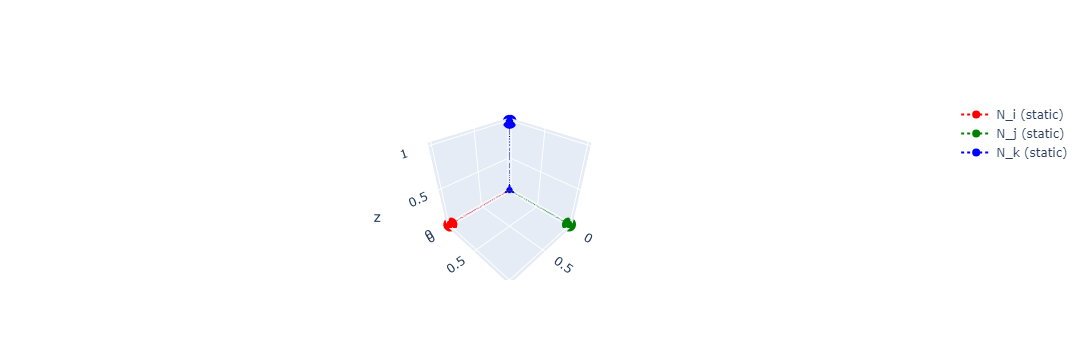

[0, 1, 2]


In [12]:
def initialize_ref_frame(fig, frame_matrix, frame_label, colors, is_static=False):
    """
    Initializes vectors on the provided Plotly figure as either static or dynamic using a color dictionary.

    Args:
        fig (plotly.graph_objects.Figure): The figure to which the frame vectors will be added.
        frame_matrix (np.ndarray): A 3x3 matrix representing the orientation of the frame, where each column is a unit vector (i, j, k).
        frame_label (str): The base label for the frame vectors ('N' for the N-frame, 'E' for the E-frame).
        colors (dict): A dictionary specifying the colors for each vector, keyed by 'i', 'j', 'k'.
        is_static (bool, optional): If True, the frame will be added as static (with dotted lines). 
                                    If False, it will be added as dynamic (with solid lines). 
                                    Defaults to False.

    Returns:
        list: A list of trace indices added to the figure.

    Example:
        colors = {'i': 'red', 'j': 'green', 'k': 'blue'}
        frame_matrix = np.eye(3)
        fig = go.Figure()
        trace_indices = initialize_ref_frame(fig, frame_matrix, 'N', colors, is_static=True)
        print(trace_indices)  # Output should be [0, 1, 2] for the first call
    """
    line_style = 'dot' if is_static else 'solid'
    
    suffix = " (static)" if is_static else ""
    
    axis_labels = ['i', 'j', 'k'] 

    trace_indices = []

    for i, axis in enumerate(axis_labels):
        vec = frame_matrix[i, :]
        name = f'{frame_label}_{axis}{suffix}'
        color = colors[axis]  # Access color using axis label as key

        # Plot each vector from origin to its components, visualizing the frame's orientation in 3D space.
        trace = go.Scatter3d(x=[0, vec[0]], 
                             y=[0, vec[1]], 
                             z=[0, vec[2]],
                             mode='lines+markers', 
                             name=name,
                             marker=dict(color=color),
                             line=dict(dash=line_style, color=color))
        fig.add_trace(trace)

        trace_indices.append(len(fig.data)-1)

    return trace_indices

# Example Usage
colors = {'i': 'red', 'j': 'green', 'k': 'blue'}
frame_matrix = np.eye(3)
fig = go.Figure()
trace_indices = initialize_ref_frame(fig, frame_matrix, 'N', colors, is_static=True)
fig.show()
print(trace_indices)

### 2.3.6.2 - Function: `apply_rotations`

The `apply_rotations` function generates rotation matrices for a series of rotations, defined by a sequence of axes and target angles, and applies them incrementally to create a smooth rotation animation.

---

**1. Inputs**:
- `rotation_sequence`: String specifying the axes order (e.g., '321' for Z, Y, X rotations).
- `target_angles`: Tuple of angles (in degrees) corresponding to each axis in the sequence.
- `steps`: Number of steps in the animation (affects the granularity of the rotations).

---

**2. Output**:
- A list of rotation matrices, representing the frame's orientation at each animation step.

---

**3. Key Workflow**:
- **Steps Calculation**: Divides the total steps by the number of rotations to calculate `steps_per_rotation`.
- **Precompute Angles**: Uses `np.linspace` to divide each target angle into incremental steps for smooth transitions.
- **Rotation Mapping**: Maps rotation axes ('1', '2', '3') to their respective rotation matrix functions (`rotation_matrix_x`, `rotation_matrix_y`, `rotation_matrix_z`).
- **Initialize Matrices**: Begins with an identity matrix \( \mathbf{I} \) and stores rotation matrices for each step.

---

**4. Main Loop**:
- **Iterates through Steps**: For each frame, applies the sequence of rotations by updating the cumulative rotation matrix with precomputed angles.
- **Apply Rotations**: Applies each rotation to the cumulative matrix, ensuring that each step is reflected accurately in the final rotation matrix for that frame.
- **Store Result**: Appends the resulting matrix for each step to the list of rotation matrices.

---

**Example Scenario**:

Let’s assume we have the following parameters:
- `rotation_sequence = '321'`
- `target_angles = (45, 30, 60)`
- `steps = 60`

The `steps_per_rotation` is calculated as:
\[
\text{steps\_per\_rotation} = \frac{\text{steps}}{3} = \frac{60}{3} = 20
\]

This means each rotation will be applied over 20 frames. Here’s a breakdown of how the rotations are applied:

- **Frames 0 to 19**: Rotation around the Z-axis (Axis '3').
- **Frames 20 to 39**: Rotation around the Y-axis (Axis '2').
- **Frames 40 to 59**: Rotation around the X-axis (Axis '1').

This results in smooth transitions across all steps, simulating the frame's orientation changes over time.


 around the X-axis.
  - Update `cumulative_steps` to 60.


In [5]:
def apply_rotations(rotation_sequence, target_angles, steps):
    """
    Generates rotation matrices and applies them to an initial frame, based on a specified rotation sequence and corresponding angles.

    Args:
        rotation_sequence (str): The sequence of axes to rotate around, specified as characters (e.g., '321' for rotations around Z, Y, X axes).
        target_angles (tuple): Tuple of target angles in degrees, each element corresponding to the rotation about the axis in the rotation_sequence.
        steps (int): Total number of steps in the animation, dictating the granularity of the rotation application.

    Returns:
        list: A list of rotation matrices corresponding to each step in the animation, representing the frame's orientation at each step.

    Notes:
        - This function uses passive rotation matrices to describe the orientation of the frame relative to a fixed reference frame. 
          The passive type is explicitly specified to clarify that the matrices are meant to simulate the observation of the frame 
          from the inertial perspective, rather than actively moving the frame itself.
        
        - Passive rotations are used here because the function is designed to show how an external observer 
          would see the frame rotate within a static global frame. 
          This is typical in applications like aerospace, where understanding how a vehicle's orientation changes 
          relative to a fixed coordinate system is crucial.
        
        - The explicit specification of 'passive' ensures that each rotation matrix rotates the coordinate axes of the frame, 
          not the objects or markers within the frame.
          
        - Each matrix generated describes how an object or frame would rotate in a static global frame 
          (i.e., rotating the object within a fixed coordinate system). 
          The matrices are used to visualize the effect of the sequence of rotations, 
          showcasing the new orientation of the frame after each rotation step.
    """
    rotation_functions = {
        '1': lambda angle: rotation_matrix_x(angle, transformation_type='passive'), 
        '2': lambda angle: rotation_matrix_y(angle, transformation_type='passive'), 
        '3': lambda angle: rotation_matrix_z(angle, transformation_type='passive')
    }

    # Calculate how many steps/frame each rotation should take
    steps_per_rotation = steps // len(rotation_sequence)
    
    # Precompute the angles for each step to avoid recalculating them in the loop
    angles = []
    for index, angle in enumerate(target_angles):
        # Create a list of angles for each step of the current rotation
        angle_steps = np.linspace(0, angle, steps_per_rotation + 1)
        angles.append(angle_steps)
    
    rotation_matrices = []
    for frame in range(steps + 1):
        R = np.eye(3)          # Start with the identity matrix (no initial rotation)
        cumulative_steps = 0   # Initialize cumulative steps for tracking rotations

        for index, axis in enumerate(rotation_sequence):
            
            # If the current frame is before the cumulative steps, exit the loop
            if frame < cumulative_steps:
                break

            # Calculate steps taken for the current axis
            axis_steps = min(frame - cumulative_steps, steps_per_rotation)
            if axis_steps > 0:
                angle_deg = angles[index][axis_steps]                     # Retrieve the precomputed angle for the current step
                R = np.matmul(rotation_functions[axis](angle_deg), R)     # Apply the current rotation to the cumulative rotation matrix

            # Update the cumulative steps to include the steps for the current rotation
            cumulative_steps += steps_per_rotation

        # Store the resulting rotation matrix for the current frame
        rotation_matrices.append(R)

    # Debug print statement to check the third rotation matrix
    #print(rotation_matrices[2])  

    return rotation_matrices

### 2.3.6.3 - setup_animation_scene

In [6]:
def setup_animation_scene(fig, frames, title):
    """
    Configures animation controls and layout settings for a Plotly figure.

    Args:
        fig (plotly.graph_objects.Figure): The figure to which the controls will be added.
        frames (list): List of animation frames to be included in the slider control.
        title (str): The title to set for the animation scene.

    Notes:
        - Animation Controls: Adds interactive controls for playing and stepping through animation frames.
        - Button Configuration: 'Play' button starts the animation immediately with smooth transitions.
        - Slider Mechanism: Slider allows navigation to specific frames for detailed examination.
        - Current Value Display: Displays the current frame number during the animation.
        - Layout Configuration: Ensures a fixed aspect ratio and consistent spatial references.
        - Scene Dimensions: Sets dimensions for comfortable viewing.
        - Usability and Interactivity: Enhances the visualization's effectiveness for presentations and educational purposes.
    """
    # Define the 'Play' button
    play_button = {"label": 'Play',
                   "method": 'animate',
                   "args": [None, {"frame": {"duration": 100, "redraw": True},
                                   "fromcurrent": True,
                                   "mode": 'immediate'}]}

    # Define the slider steps
    slider_steps = [{"method": 'animate',
                     "args": [[f.name], {"mode": 'immediate',
                                         "frame": {"duration": 100, "redraw": True},
                                         "fromcurrent": True}],
                     "label": str(k)} for k, f in enumerate(frames)]

    # Update the figure layout with animation controls and scene settings
    fig.update_layout(updatemenus=[{"type": "buttons",
                                    "showactive": False,
                                    "y": -0.13,
                                    "x": -0.02,
                                    "xanchor": 'left',
                                    "yanchor": 'bottom',
                                    "buttons": [play_button]}],
                      sliders=[{"steps": slider_steps,
                                "x": 0.1,
                                "y": 0,
                                "currentvalue": {"visible": True, "prefix": 'Step: '}}],
                      width=1000,
                      height=800,
                      template='presentation',
                      scene={"aspectmode": 'cube',
                             "xaxis": {"range": [-1, 1], "autorange": False},
                             "yaxis": {"range": [-1, 1], "autorange": False},
                             "zaxis": {"range": [-1, 1], "autorange": False}},
                      title=title)

### 2.3.6.4 - initialize_single_gimbal

In [7]:
def initialize_single_gimbal(fig, axis='z', base_radius=0.5, marker_size=3, is_static=False):
    """
    Initializes and adds a single gimbal visualization to a Plotly figure. The gimbal consists of a circular arc and point markers,
    oriented along one of the coordinate axes (x, y, or z). The appearance and static/dynamic style of the gimbal can be configured.

    Parameters:
        fig (plotly.graph_objects.Figure): The figure to which the gimbal will be added.
        axis (str, optional): Axis along which the gimbal will be oriented ('x', 'y', or 'z'). Defaults to 'z'.
        base_radius (float, optional): Base radius of the gimbal circle, adjusted based on the axis. Defaults to 0.5.
        marker_size (int, optional): Size of the markers on the gimbal arc. Defaults to 3.
        is_static (bool, optional): If True, displays the gimbal as static (dotted lines); otherwise dynamic (solid lines). Defaults to False.

    Returns:
        dict: Contains the plotted arc and markers' data under the keys 'arc' and 'markers'.
        list: Indices in the figure's data array where the gimbal traces were added.

    Notes:
        - Adds traces for the gimbal arc and markers directly to the passed figure.
        - Utilizes different colors and scales for gimbals based on their alignment axis:
          'red' for x, 'green' for y, 'blue' for z.
        - Adds a "(static)" suffix to the arc trace name if the gimbal is static.
    """
    # Define properties for each axis
    axis_properties = {'x': {'color': 'red', 'scale': 0.8},
                       'y': {'color': 'green', 'scale': 0.9},
                       'z': {'color': 'blue', 'scale': 1.0}
                      }

    # Retreive properties for specified axis
    properties = axis_properties[axis]

    # Number of samples/vertices/points for the arc and markers
    arc_vertices  = 100
    marker_points = 8

    # Define angular coordinates for the arc and markers
    theta = np.linspace(0, 2 * np.pi, arc_vertices)
    phi   = np.linspace(0, 2 * np.pi, marker_points, endpoint=False)
    
    # radius of circle/gimbal based on property of chosen axis
    r = base_radius * properties['scale']

    # Generate coordinate of gimbal and markers along chosen axis
    if axis == 'x':
        arc_coords = (np.zeros(arc_vertices), r * np.cos(theta), r * np.sin(theta))
        marker_coords = (np.zeros(marker_points), r * np.cos(phi), r * np.sin(phi))
    
    elif axis == 'y':
        arc_coords = (r * np.sin(theta), np.zeros(arc_vertices), r * np.cos(theta))
        marker_coords = (r * np.sin(phi), np.zeros(marker_points), r * np.cos(phi))
    
    elif axis == 'z':
        arc_coords = (r * np.cos(theta), r * np.sin(theta), np.zeros(arc_vertices))
        marker_coords = (r * np.cos(phi), r * np.sin(phi), np.zeros(marker_points))

    gimbal_data = {"arc": np.vstack(arc_coords), 
                   "markers": np.vstack(marker_coords)}
    
    line_style = 'dot' if is_static else 'solid'
    suffix = " (static)" if is_static else ""
    
    trace_indices = []

    # Add arc trace with suffix
    arc_trace = go.Scatter3d(x=gimbal_data["arc"][0], 
                             y=gimbal_data["arc"][1], 
                             z=gimbal_data["arc"][2],
                             mode='lines', 
                             line=dict(color=properties['color'], width=5, dash=line_style), 
                             name=f'{axis}-axis gimbal_arc{suffix}')
    fig.add_trace(arc_trace)
    trace_indices.append(len(fig.data) - 1)

    # Add markers trace without name and set showlegend to False
    markers_trace = go.Scatter3d(x=gimbal_data["markers"][0], 
                                 y=gimbal_data["markers"][1], 
                                 z=gimbal_data["markers"][2],
                                 mode='markers', 
                                 marker=dict(color=properties['color'], size=marker_size), 
                                 showlegend=False)
    fig.add_trace(markers_trace)
    trace_indices.append(len(fig.data) - 1)

    return gimbal_data, trace_indices

### 2.3.6.5 - rotate_gimbal

In [8]:
def rotate_gimbal(rotation_matrix, gimbal_data):
    """
    Applies the transpose of the given rotation matrix to the gimbal's data to ensure it aligns correctly with the intended orientation in a 3D space.
    This function is particularly used to rotate a gimbal such that it maintains its relative orientation to a previously rotated reference frame,
    typically the dynamic frame in simulations or visualizations.

    Parameters:
        rotation_matrix (numpy.ndarray): The rotation matrix that has been used to transform the coordinate frame.
        gimbal_data (dict): A dictionary containing the current coordinates of the gimbal's components ('arc' and 'markers').

    Returns:
        dict: A dictionary with updated coordinates for 'arc' and 'markers' after applying the transformation.

    Notes:
        - The rotation matrix R used here typically represents a passive transformation, applied to the coordinate frame. 
          This means it transforms the coordinate axes themselves rather than the objects within the frame. 
        
        - From the perspective of an external observer, if the same rotation matrix R were applied directly to an object, 
          that object would appear to rotate in the opposite direction to the frame rotation.
        
        - To align the gimbal with a frame that has been rotated by R, we apply R^T (the transpose of R), 
          which corresponds to the active rotation of the gimbal.
          This active rotation ensures that the gimbal tracks and maintains its orientation relative to the rotated frame, 
          moving synchronously with any fixed object relative to that frame.
        
        - The use of transpose (R^T) instead of the inverse (R^-1) is due to computationally efficiency since the rotation matrix R is orthogonal.
          For orthogonal matrices, the transpose and the inverse are the same, 
          making the transpose operation computationally cheaper and more straightforward to implement.
        
        - This technique is crucial in applications such as aerospace and robotics, 
          where maintaining a precise relative orientation between objects (like cameras or sensors on a gimbal) 
          and their reference frame is essential for accurate operation and control.
    """  
    rotation_matrix_Transposed = rotation_matrix.T
    
    updated_gimbal_data = {"arc": np.matmul(rotation_matrix_Transposed, gimbal_data["arc"]),
                           "markers": np.matmul(rotation_matrix_Transposed, gimbal_data["markers"])}
    
    return updated_gimbal_data

### 2.3.6.6 - euler_rotation_animation

In [9]:
def euler_rotation_animation(rotation_sequence, target_angles_tuple, steps=60):
    """
    Creates a 3D animation of Euler rotations based on a specified sequence and corresponding angles, and displays the final orientation of the frame.

    Args:
        rotation_sequence (str): A string representing the desired rotation sequence (e.g., '321' for ZYX rotations).
        target_angles_tuple (tuple): A tuple containing 3 angles in degrees for each rotation specified in the rotation sequence.
        steps (int, optional): The total number of steps in the animation. Defaults to 30.

    Returns:
        plotly.graph_objects.Figure: The figure object containing the animation.

    Notes:
        - **Dynamic Frame Calculation**: Calculates rotation matrices for each step based on the rotation sequence and target angles.
        - **Identity Matrix Use**: Begins with an identity matrix to visualize the rotation from a no-rotation state.
        - **Color Mapping**: Uses a predefined color dictionary to distinguish between different axes.
        - **In-place Frame Updates**: Utilizes Plotly's capabilities to manage complex animations efficiently by updating the figure object in-place.
        - **Final Orientation**: Outputs the final orientation matrix, setting small values to zero for readability.

    Example:
        fig = euler_rotation_animation('321', (45, 45, 45))
        fig.show()
    """
    # Initialize the figure for 3D visualization
    fig = go.Figure()

    # Create the identity matrix representing the initial orientation of the frame
    N_frame = np.eye(3)

    # Dictionary of colors specifying colors of axes
    axis_colors = {'i': 'red', 
                   'j': 'green', 
                   'k': 'blue'}

    # Initialize the static N-frame
    n_frame_indices = initialize_ref_frame(fig = fig, 
                                           frame_matrix = N_frame, 
                                           frame_label = 'N', 
                                           colors = axis_colors, 
                                           is_static=True)

    # Initialize the dynamic E-frame
    e_frame_indices = initialize_ref_frame(fig = fig, 
                                           frame_matrix = N_frame, 
                                           frame_label = 'E', 
                                           colors = axis_colors, 
                                           is_static=False)

    # Initialize static gimbals for each axis
    gimbal_data_x, trace_indices_x = initialize_single_gimbal(fig=fig, axis='x', is_static=True)
    gimbal_data_y, trace_indices_y = initialize_single_gimbal(fig=fig, axis='y', is_static=True)
    gimbal_data_z, trace_indices_z = initialize_single_gimbal(fig=fig, axis='z', is_static=True)
    
    # Initialize dynamic gimbals for each axis
    gimbal_data_x, trace_indices_x = initialize_single_gimbal(fig=fig, axis='x', is_static=False)
    gimbal_data_y, trace_indices_y = initialize_single_gimbal(fig=fig, axis='y', is_static=False)
    gimbal_data_z, trace_indices_z = initialize_single_gimbal(fig=fig, axis='z', is_static=False)

    # Generate rotation matrices for each frame/step of the animation
    rotation_matrices = apply_rotations(rotation_sequence, target_angles_tuple, steps)

    # Generate Data for each Animation Frame/step
    frames = []
    for i, R in enumerate(rotation_matrices):
        E_frame = np.matmul(R, N_frame)
        frame_data = []
        for j, vec in enumerate(E_frame):
            vectors = go.Scatter3d(x=[0, vec[0]], 
                                   y=[0, vec[1]], 
                                   z=[0, vec[2]],
                                   mode='lines+markers', 
                                   name=f'E_{list(axis_colors.keys())[j]}',
                                   marker=dict(color=axis_colors[list(axis_colors.keys())[j]]))
            frame_data.append(vectors)

         # Rotate each gimbal using the same rotation matrix for demonstration
        if i<=steps//3:
            rotated_gimbal_z = rotate_gimbal(R, gimbal_data_z)
            rotated_gimbal_y = rotate_gimbal(R, gimbal_data_y)
            rotated_gimbal_x = rotate_gimbal(R, gimbal_data_x)
        elif steps//3 < i <= 2*steps//3:
            rotated_gimbal_y = rotate_gimbal(R, gimbal_data_y)
            rotated_gimbal_x = rotate_gimbal(R, gimbal_data_x)
        else:
            rotated_gimbal_x = rotate_gimbal(R, gimbal_data_x)
        
        # Update each gimbal's visualization  
        frame_data += [    
            go.Scatter3d(x=rotated_gimbal_x["arc"][0], 
                         y=rotated_gimbal_x["arc"][1], 
                         z=rotated_gimbal_x["arc"][2], mode='lines', line=dict(color='red')),
            go.Scatter3d(x=rotated_gimbal_x["markers"][0], 
                         y=rotated_gimbal_x["markers"][1], 
                         z=rotated_gimbal_x["markers"][2], mode='markers', marker=dict(color='red', size=3)),
            
            go.Scatter3d(x=rotated_gimbal_y["arc"][0], 
                         y=rotated_gimbal_y["arc"][1], 
                         z=rotated_gimbal_y["arc"][2], mode='lines', line=dict(color='green')),
            go.Scatter3d(x=rotated_gimbal_y["markers"][0], 
                         y=rotated_gimbal_y["markers"][1], 
                         z=rotated_gimbal_y["markers"][2], mode='markers', marker=dict(color='green', size=3)),
            
            go.Scatter3d(x=rotated_gimbal_z["arc"][0], 
                         y=rotated_gimbal_z["arc"][1], 
                         z=rotated_gimbal_z["arc"][2], mode='lines', line=dict(color='blue')),
            go.Scatter3d(x=rotated_gimbal_z["markers"][0], 
                         y=rotated_gimbal_z["markers"][1], 
                         z=rotated_gimbal_z["markers"][2], mode='markers', marker=dict(color='blue', size=3))]

        frames.append(go.Frame(data=frame_data, 
                               name=str(i), 
                               traces=e_frame_indices+trace_indices_x+trace_indices_y+trace_indices_z))
    
    # Configure the figure with the generated frames
    fig.frames = frames

    # Set small values to zero
    E_frame[np.isclose(E_frame, 0, atol=1e-10)] = 0
    print(f'Final E-Frame Orientation:\n{np.matrix(E_frame)}')
    
    setup_animation_scene(fig, frames, "Euler Angles Rotation Animated")

    return fig

Final E-Frame Orientation:
[[ 0.92541658  0.33682409 -0.17364818]
 [-0.36515929  0.91510341 -0.17101007]
 [ 0.10130573  0.2216648   0.96984631]]


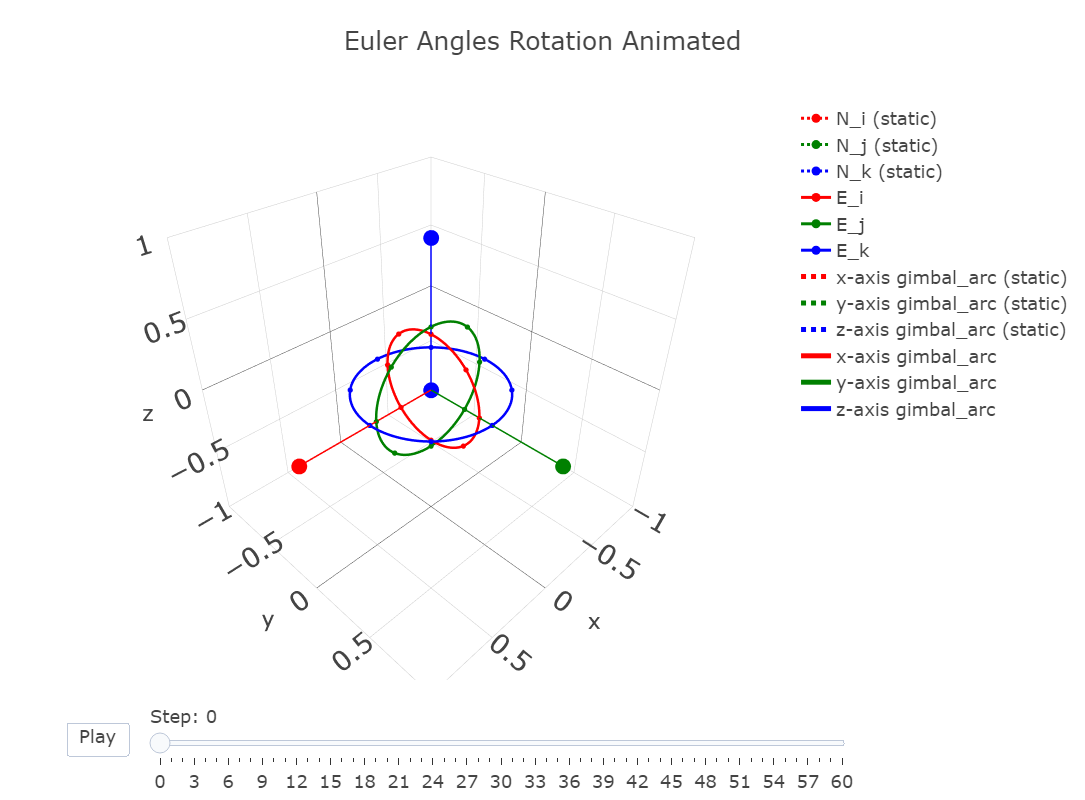

In [10]:
# Example usage (Asymmetric set):
fig = euler_rotation_animation('321', (20, 10, -10))
fig.show()

Final E-Frame Orientation:
[[ 0.          0.9961947  -0.08715574]
 [ 0.          0.08715574  0.9961947 ]
 [ 1.          0.          0.        ]]


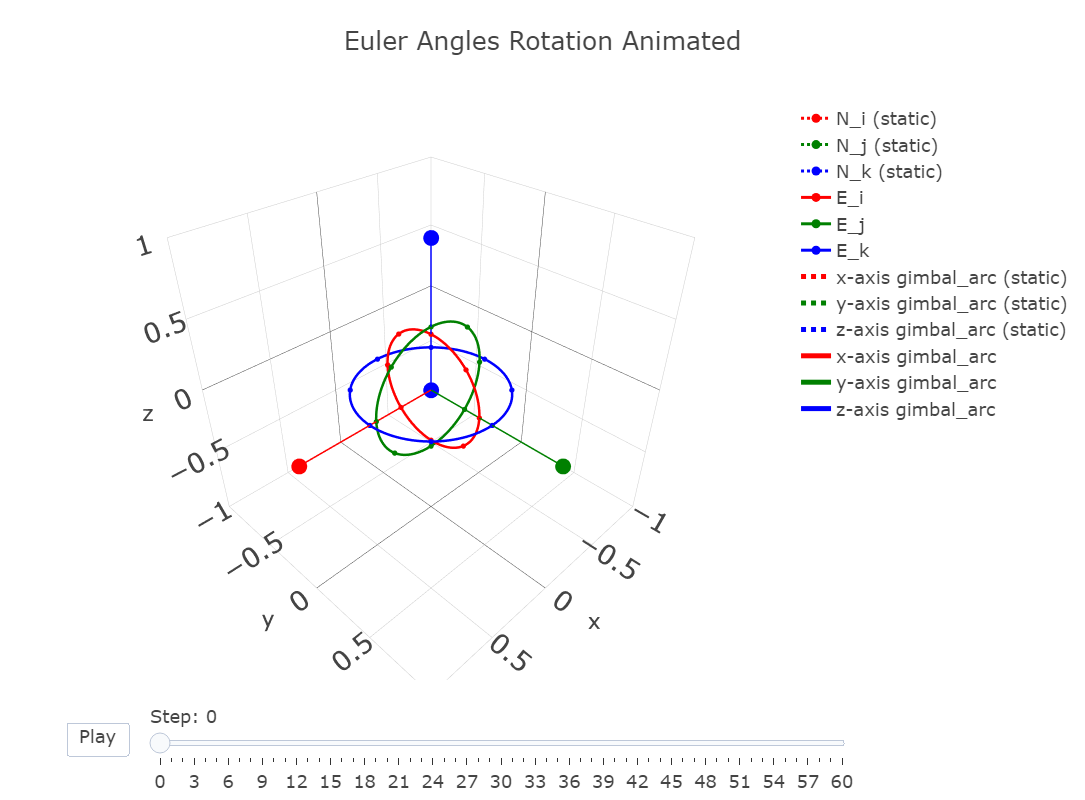

In [11]:
# Example usage (Symmetric set):
fig = euler_rotation_animation('123', (60, 90, 25))
fig.show()